In [1]:
import pandas as pd
data=pd.read_csv('data_assignment1.csv')
data=data[data['Error.In.Data']==0]
print(data.shape)

(125838, 38)


In [2]:
data.head()

,Match,Date,Innings,Over,Runs,Total.Runs,Innings.Total.Runs,Runs.Remaining,Total.Out,Innings.Total.Out,...,at.bat.won.toss,at.bat.at.home,at.bat.bat.first,chose_bat_1st,chose_bat_2nd,forced_bat_1st,forced_bat_2nd,new.game,Error.In.Data,common.support
0,65193,14/05/1999,1,1,4,4,204,200,0,10,...,0,0,1,0,0,1,0,1,0,1
1,65193,14/05/1999,1,2,2,6,204,198,0,10,...,0,0,1,0,0,1,0,0,0,1
2,65193,14/05/1999,1,3,3,9,204,195,0,10,...,0,0,1,0,0,1,0,0,0,1
3,65193,14/05/1999,1,4,2,20,204,184,0,10,...,0,0,1,0,0,1,0,0,0,1
4,65193,14/05/1999,1,5,6,37,204,167,0,10,...,0,0,1,0,0,1,0,0,0,1


In [3]:
num_matches=len(set(data['Match']))
print("Number of matches:",num_matches)

Number of matches: 1412


In [4]:
filtered_data=data[data['Innings']==1]
filtered_data=filtered_data[['Match','Innings','Over','Total.Runs','Total.Out','Innings.Total.Runs']]

In [5]:
filtered_data.head()

,Match,Innings,Over,Total.Runs,Total.Out,Innings.Total.Runs
0,65193,1,1,4,0,204
1,65193,1,2,6,0,204
2,65193,1,3,9,0,204
3,65193,1,4,20,0,204
4,65193,1,5,37,0,204


In [6]:
print(filtered_data.shape)

(67288, 6)


In [7]:
import numpy as np
z0_L=np.random.rand(11)

def Z(u,w,z0_L):
    z_indx=w-1
    return z0_L[z_indx]*(1-np.exp(-(z0_L[10]*u)/z0_L[z_indx]))

def residual(z0_L,u,w,R):
    return Z(u,w,z0_L)-R

In [8]:
u_train=50-filtered_data['Over'].values
w_train=10-filtered_data['Total.Out'].values
R_train=filtered_data['Innings.Total.Runs'].values-filtered_data['Total.Runs'].values

In [9]:
from scipy.optimize import least_squares
res_lsq = least_squares(residual, z0_L, args=(u_train,w_train,R_train))

In [15]:
print("Initial params (Z1 to Z10 and L):",z0_L)

Initial params (Z1 to Z10 and L): [0.38256421 0.60160632 0.65812846 0.17686689 0.18018639 0.08757459
 0.78854963 0.1392176  0.14314466 0.87992949 0.54925881]


In [16]:
print("Trained params (Z1 to Z10 and L):",res_lsq.x)

Trained params (Z1 to Z10 and L): [ 11.69542635  26.85637365  50.74649238  78.75249173 104.05541433
 137.9132313  169.20828522 207.69465755 239.49327647 284.89049591
  10.84280856]


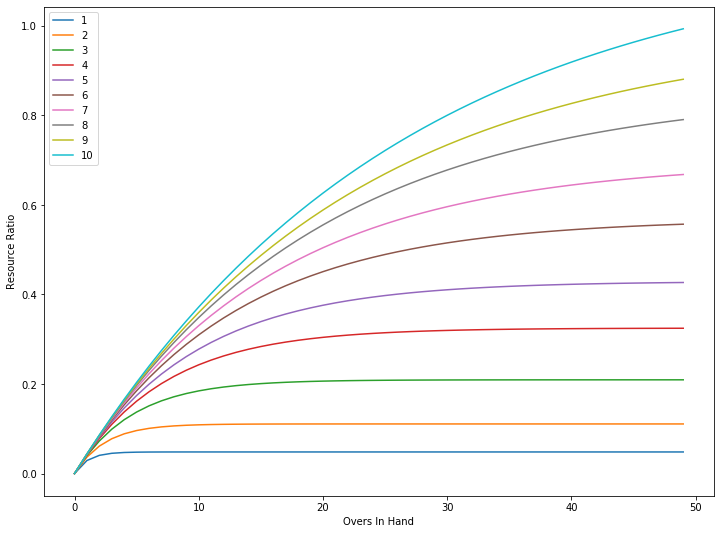

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
for wickets_in_hand in range(1,11):
    x=np.arange(50)
    y=Z(np.arange(50),wickets_in_hand,res_lsq.x)/Z(50,10,res_lsq.x)
    plt.plot(x,y,label=str(wickets_in_hand))
plt.xlabel('Overs In Hand')
plt.ylabel('Resource Ratio')
plt.legend()
plt.show()

In [21]:
print("Cost at solution:",res_lsq.cost)

Cost at solution: 52209037.68848635
